# LAB | Probability distributions

## Import libraries here

In [1]:
# Libraries
from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

### Generate samples and test normal distribution.
- Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.
- Read the documentation for `scipy.stats.norm.rvs` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The function will help you create the normal random samples.

In [2]:
mi = 50
sigma = 5
sample_size = [10, 50, 500, 5000]

random_samples = [stats.norm.rvs(mi, sigma, size) for size in sample_size]

### Plot normal distributions.
- To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 
- Your output should look like the figure below:

![normal distributions with different sample sizes](images/ch-1.png)

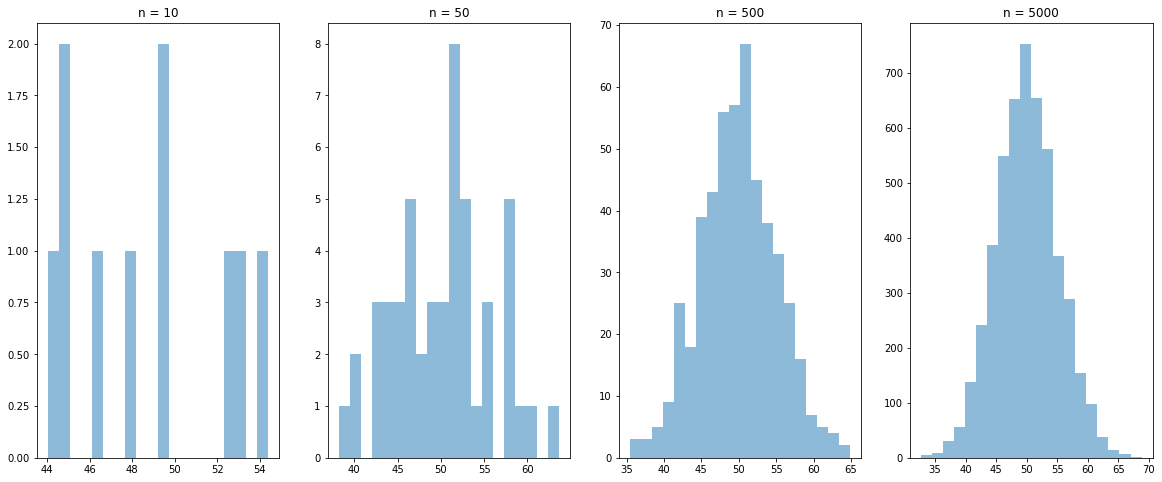

In [3]:
fig, ax = plt.subplots(1, 4, figsize = (20,8))

for i in range(4):
    ax[i].set_title('n = ' + str(sample_size[i]))
    ax[i].hist(random_samples[i], 20, alpha=0.5)

#### Compare the distributions above
- What do you observe? Explain with the Central Limit Theorem.

1) We can see in the diagrams that as we add more and more samples, the distribution begins to look like a normal (bell-shaped) distribution. This tendency is fundamental to statistics and is called the Central Limit Theorem. **The Central Limit Theorem states that given a population for which we do not know the distribution (such as the heights of all data students, globally), as we draw more samples from the population, the distribution of the sample means approaches a normal distribution and converges to the theoretical values of the underlying population distribution. This is true for all populations, no matter the shape of the population distribution.**

2) The mean of the sampling distribution will be approximately the population mean, and will become equal to the sample mean as the number of samples gets very large.

3) As the number of samples and the size of those samples increase, the better we approximate the true population mean. This makes sense that each time we resample the population or increase our sample size, we are obtaining more information about our population: at some point we will have sampled our entire population, so the parameters from our sample will be exactly equal to those of our population.

4) Simply: the statistical inferences we make about our population get better the more data we gather.

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

- We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

####  Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.
```python
stats.binom(n, p)
```

In [4]:
dist = stats.binom(5, 0.15)

#### Plot the PMF of the distribution. 
- Your output should look like the figure below:

![binom 10](images/ch-2.png)

In [5]:
dist.pmf(5)

7.593750000000001e-05

In [6]:
dist.pmf(np.arange(0,5))

array([0.44370531, 0.39150469, 0.13817812, 0.02438437, 0.00215156])

<AxesSubplot:>

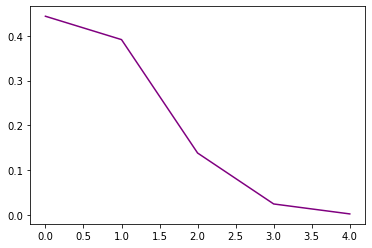

In [7]:
sns.lineplot(x=np.arange(0,5), 
            y=dist.pmf(np.arange(0,5)),
            color='purple')

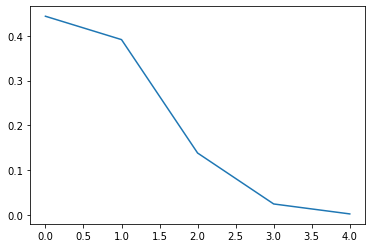

In [8]:
# Option 2

# Variables 
n = 5
p = 0.15
x = range(n)

# Binomial distribution
dist = stats.binom(n, p)

# Plot
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### Explain what you observe from the plot above.

- since we have a discrete variable, the plot shows only lines between whole numbers

- all values sum up to 1

- the probability of a person to click the ad falls down as long as we have more users

#### Now plot PMF with 50, 500, and 5000 visitors.
- To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.
- Your output should look like the figure below:
![prf](images/ch-2b.png)

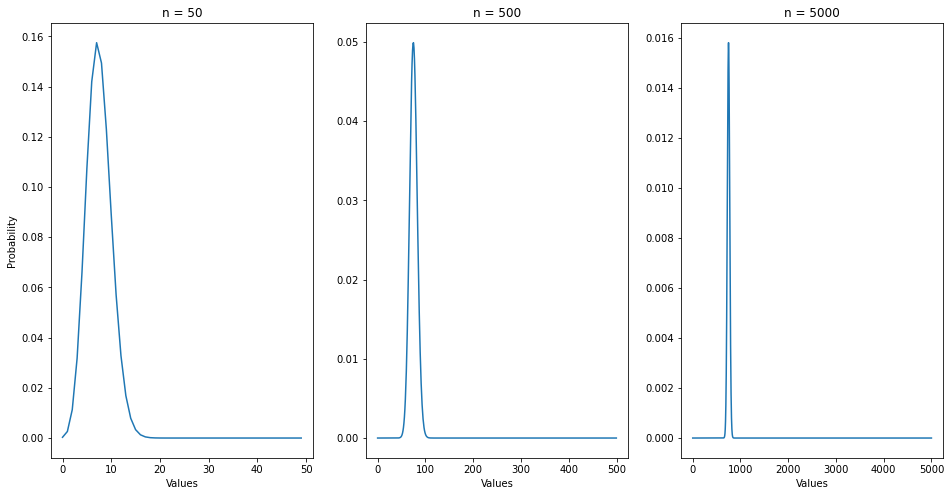

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (16, 8))
sample_size = [50, 500, 5000]

for i in range(3):
    x = range(sample_size[i])
    dist = stats.binom(sample_size[i], p)
    axes[i].set_title('n = ' + str(sample_size[i]))
    axes[i].plot(x, dist.pmf(x))
    axes[i].set_xlabel('Values')
    
axes[0].set_ylabel('Probability');

#### What did you notice from the distribution plots?

- The distribution changes as long as the sample size increases.

- This is because the shape of the binomial distribution depends on the size of the group of people that clicked or not the ad.

#  Challenge 3 - Poisson distribution

- The Poisson distribution is a discrete distribution function expressing probability of a given number of events occurring over a fixed interval of time or space.

- Using poisson distribution, solve the challenge below
- A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?
```python
scipy.stats.poisson.pmf()
```

In [10]:
mi = 300
new = 320

stats.poisson.pmf(new, mi)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [11]:
mi = 300
new = 60

stats.poisson.pmf(new, mi)

2.622743762294515e-64

#### Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [12]:
mi = 300
new = range(1000)

arr = [stats.poisson.pmf(new, mi) for new in new]

#### Plot the probabilities.
- Your output should look like the figure below:
![poisson distribution](images/ch-3.png)

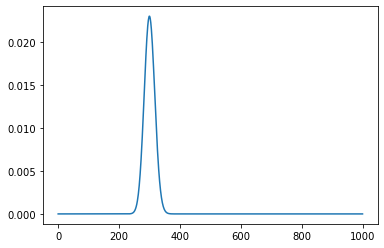

In [13]:
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem
- In this challenge we will work with the central limit theorem
- A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.
- What is the probability that the mean delivery time today is between 30 and 35 minutes?
```python
stats.norm.cdf()
```

In [14]:
mi = 35;
stdv = 8;
nr_samples = 200;
sigma = stdv / np.sqrt(nr_samples)

# Probability
prob_30_35 = stats.norm.cdf(35, mi, sigma) - stats.norm.cdf(30, mi, sigma)
prob_30_35

0.5

#### What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [15]:
time = 115 * 60
time_x_package = time / nr_samples

In [16]:
1  - stats.norm.cdf(time_x_package, mi, sigma)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.
- Find the probability that the monthly sales are more than 300.
```python
stats.norm.cdf()
```


In [17]:
mi = 200
sigma = 40

In [18]:
1  - stats.norm.cdf(300, mi, sigma)

0.006209665325776159

#### Find the probability that the monthly sales fall between 160 and 240.

In [19]:
stats.norm.cdf(240, mi, sigma) - stats.norm.cdf(160, mi, sigma)

0.6826894921370859

#### Find the probability that the monthly sales do not exceed 150.

In [20]:
stats.norm.cdf(150, mi, sigma)

0.10564977366685535

#### Find the probability that the monthly sales exceed 3000.

In [21]:
1 - stats.norm.cdf(3000, mi, sigma)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.
- Find the probability that in a particular month there is no violent robbery.
```python
stats.norm.cdf()
```

In [22]:
mi = 4

In [23]:
stats.poisson.cdf(0, mi)

0.018315638888734182

#### Find the probability that there are at least 1 robbery in a given month.

In [24]:
stats.poisson.cdf(1, mi)

0.0915781944436709

#### Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [25]:
stats.poisson.cdf(6, mi) - stats.poisson.cdf(2, mi)

0.6512227160438819

#### Find the probability that there are more than 2 robberies in 15 days.

In [26]:
1 - stats.poisson.cdf(2, mi/2)

0.3233235838169366